In [1]:

!pip install category_encoders

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Company_Data.csv')

In [4]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [8]:
df.shape

(400, 11)

In [9]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: >

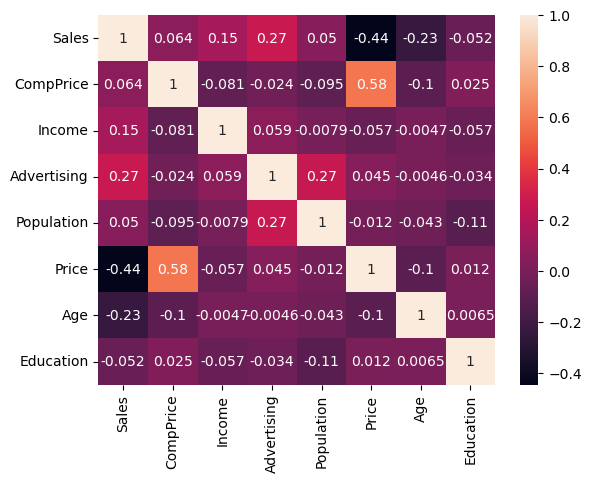

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#import labelencoder
from sklearn import preprocessing

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])
df["Urban"]= label_encoder.fit_transform(df["Urban"])
df["US"]= label_encoder.fit_transform(df["US"])

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [14]:
# encode variables with ordinal encoding
import category_encoders as ce

In [15]:
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
df1 = encoder.fit_transform(df)

In [24]:
df_val = []
for value in df["Sales"]:
     if value<=7.49:
        df_val.append("low")
     else:
        df_val.append("high")

df1["df_val"]= df_val

In [25]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,df_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low


In [26]:
X = df1.iloc[:,1:-1]
y = df1.iloc[:,-1]

In [27]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [28]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: df_val, Length: 400, dtype: object

# Building Decision Tree Classifier:

In [33]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
#import library Train test split

from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
predict = model.predict(X_test)

In [40]:
pd.Series(predict).value_counts()

low     49
high    31
dtype: int64

In [41]:
y_test

132    high
390     low
310    high
3       low
248     low
       ... 
361    high
197     low
23      low
54      low
58      low
Name: df_val, Length: 80, dtype: object

In [42]:
predict

array(['low', 'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high'],
      dtype=object)

In [43]:
pd.crosstab(y_test,predict)

col_0,high,low
df_val,,
high,20,15
low,11,34


In [44]:
# Accuracy :
np.mean(predict == y_test)

0.675

# Decision Tree

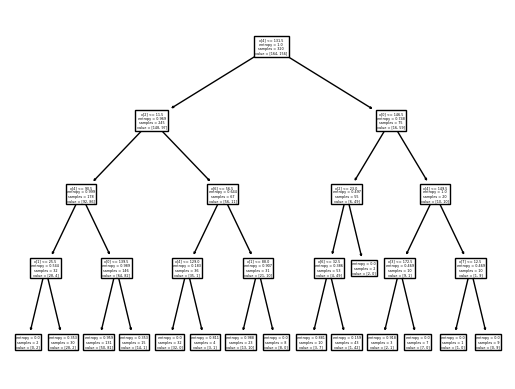

In [45]:
# Plotting Decision Tree :
from sklearn import tree

tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree ')

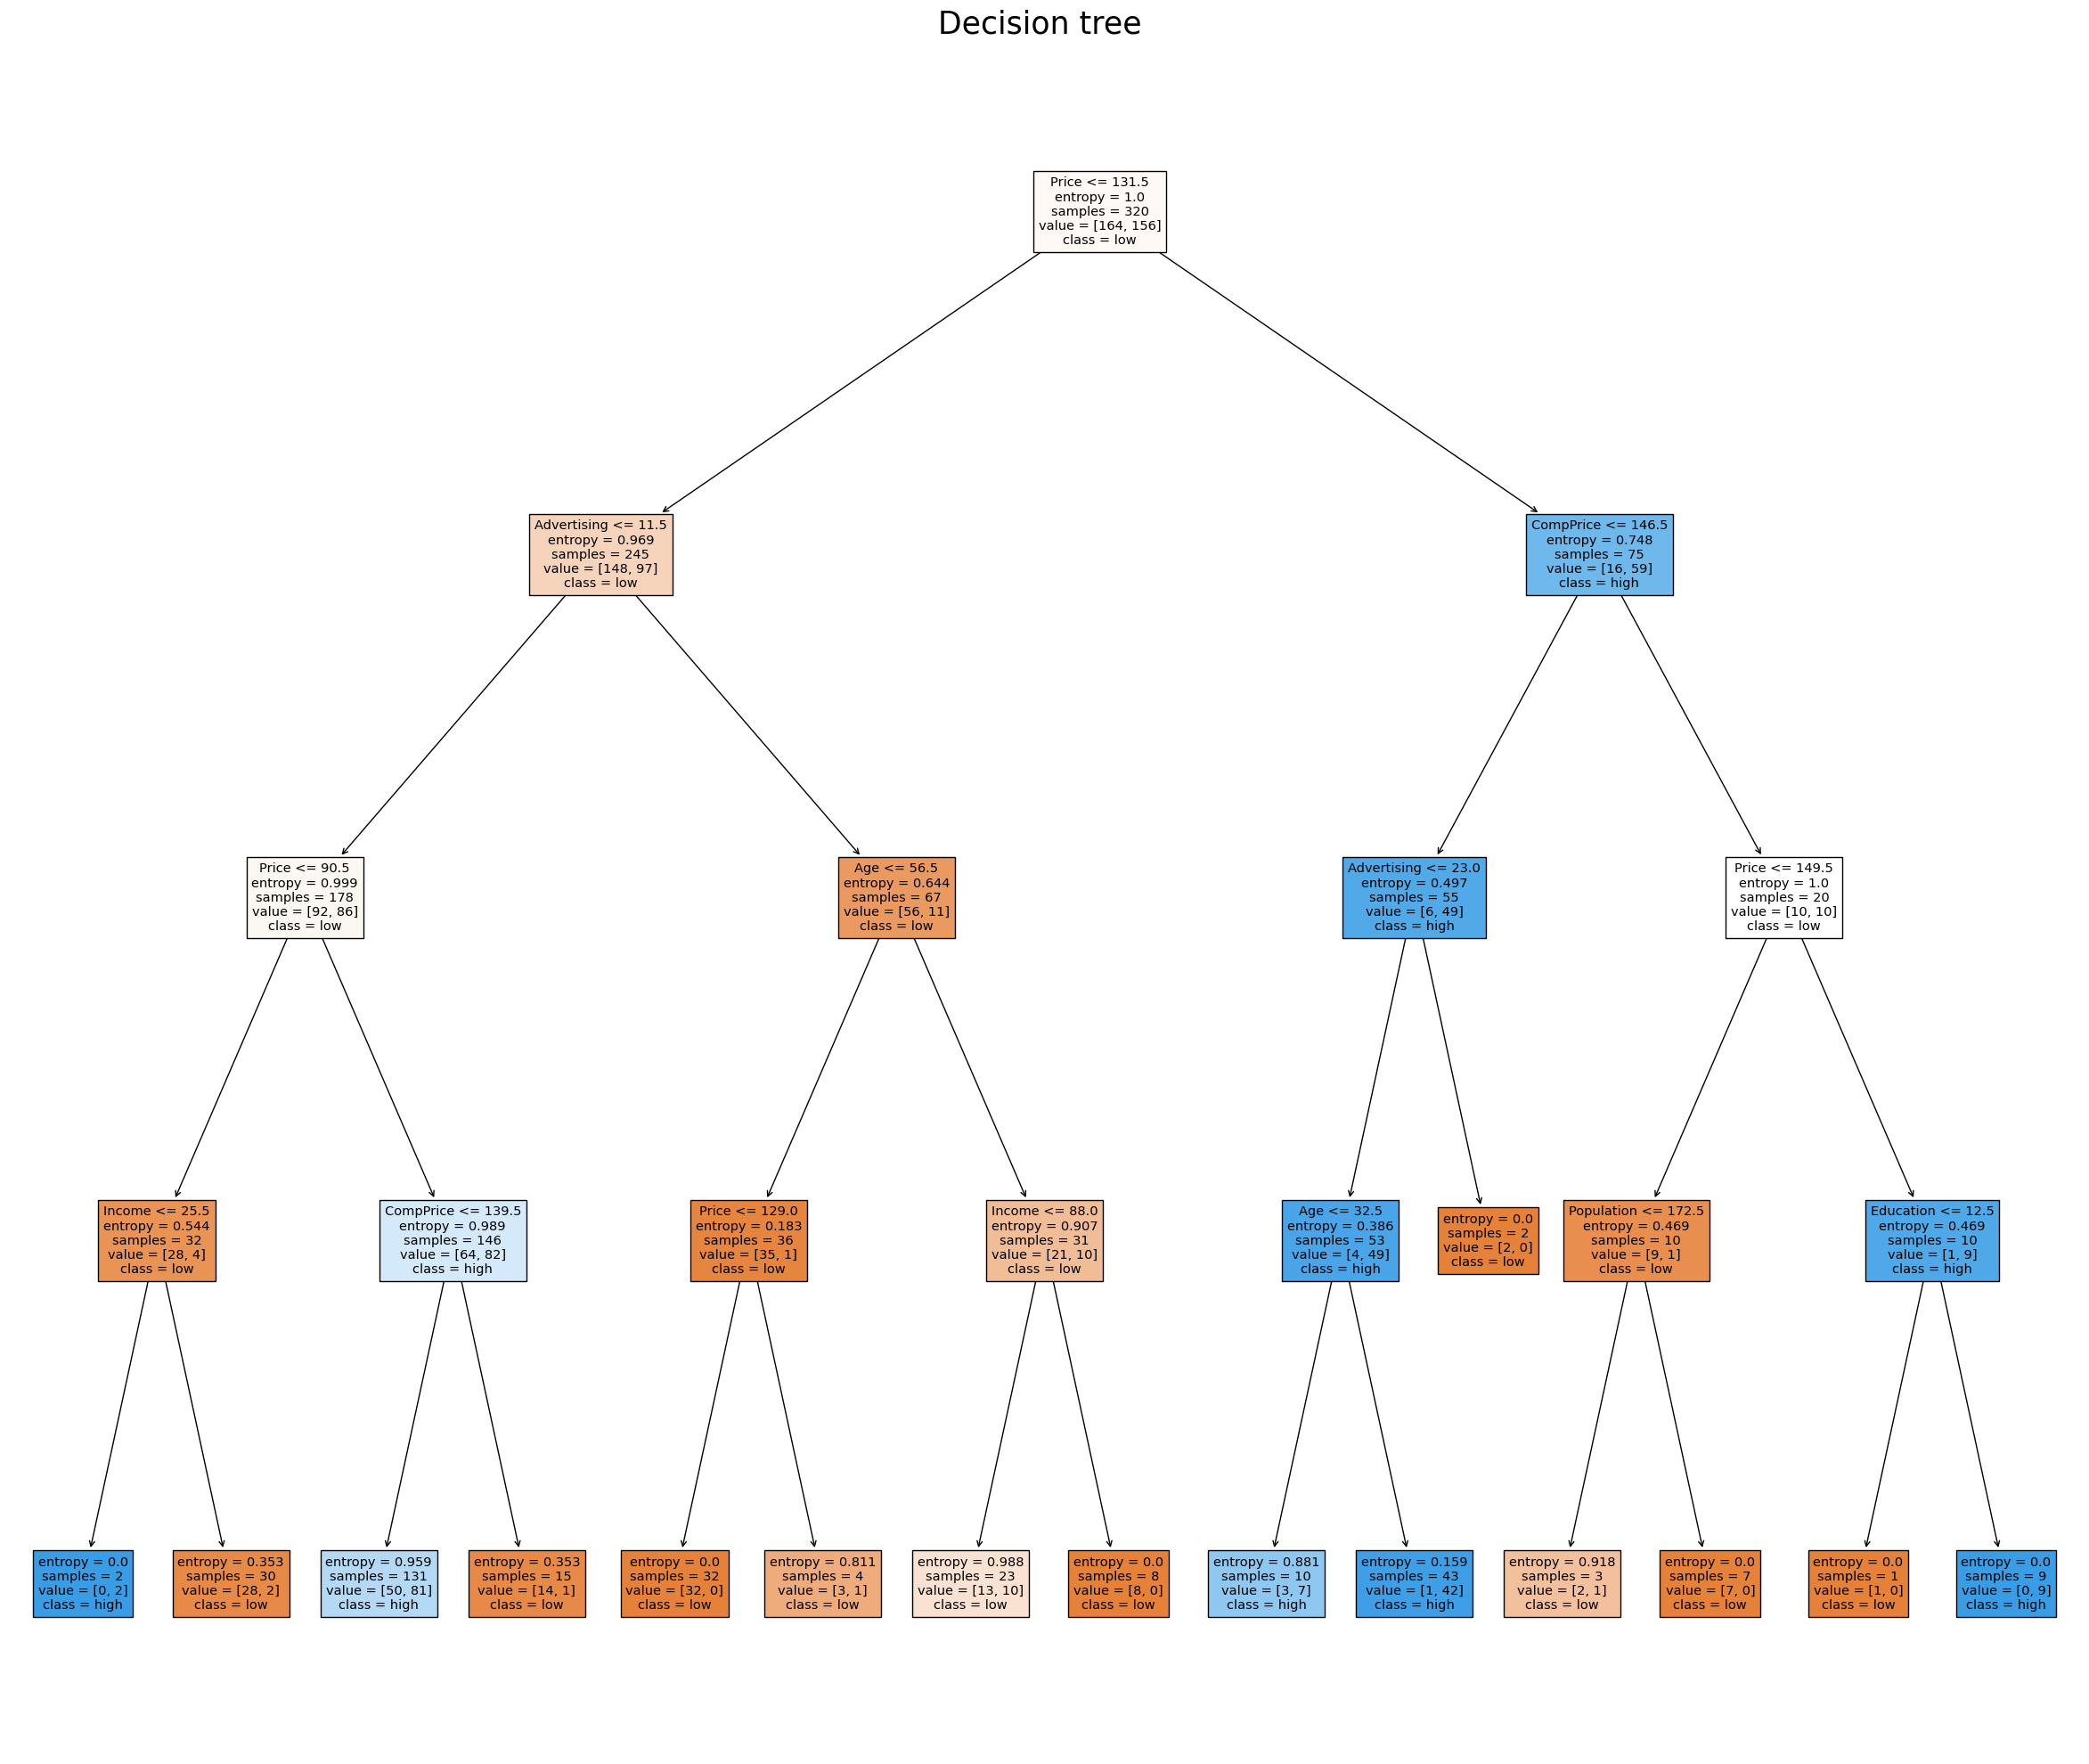

In [52]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree ',fontsize=25)